# <font color='navy'> **Reservaciones de Hotel** </font> 
## <font color='navy'> **(Meta aprendizaje)** </font> 

**Elaborado por:** Scarlett Magdaleno Gatica.

El objetivo de este Notebook es utilizar el dataset de _"Reservaciones de Hotel"_, el cual contiene reservaciones etiquetadas como canceladas o no canceladas, con el propósito de alcanzar cuatro objetivos principales:

1. El primer objetivo implica la construcción y evaluación de 5 modelos de clasificación, seguido de una comparación de sus resultados utilizando las métricas de exactitud, sensibilidad y especificidad. Además, de representar las correspondientes matrices de confusión.

2. El segundo objetivo se enfoca en comparar el rendimiento de los modelos al utilizar los datos en su formato original en contraste con el uso de los datos en un espacio modificado a través de técnicas de reducción de dimensionalidad, como PCA y UMAP.

3. El tercer objetivo consiste en explorar 7 métodos de meta-aprendizaje mediante la generación de modelos de ensamble. Comparando los resultados con el mejor modelo individual obtenido en el objetivo anterior en términos de exactitud, sensibilidad y especificidad. Además de realizar un análisis a profundidad a partir de las matrices de confusión. 

4. El cuarto objetivo es optimizar los hiperparámetros de los mejores modelos, tanto individual como de ensambles.

El dataset de [reservaciones de hotel](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) se ha obtenido de Kaggel y fue proporcionado por el usuario Ahsan Raza.


El dataset consta de los 19 atributos siguientes:

1. **Booking_ID:** Identificador único de cada reserva.
2. **no_of_adults:** Número de adultos.
3. **no_of_children:** Número de niños.
4. **no_of_weekend_nights:** Número de noches de fin de semana (sábado o domingo) que el huésped se quedó o reservó en el hotel.
5. **no_of_week_nights:** Número de noches de semana (lunes a viernes) que el huésped se quedó o reservó en el hotel.
6. **type_of_meal_plan:** Tipo de plan de comidas reservado por el cliente.
7. **required_car_parking_space:** ¿Necesita el cliente un espacio de estacionamiento para el coche? (0 - No, 1 - Sí).
8. **room_type_reserved:** Tipo de habitación reservada por el cliente. Los valores están codificados por INN Hotels.
9. **lead_time:** Número de días entre la fecha de reserva y la fecha de llegada.
10. **arrival_year:** Año de la fecha de llegada.
11. **arrival_month:** Mes de la fecha de llegada.
12. **arrival_date:** Día del mes de la fecha de llegada.
13. **market_segment_type:** Designación del segmento de mercado.
14. **repeated_guest:** ¿Es el cliente un huésped recurrente? (0 - No, 1 - Sí).
15. **no_of_previous_cancellations:** Número de reservas anteriores canceladas por el cliente antes de la reserva actual.
16. **no_of_previous_bookings_not_canceled:** Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
17. **avg_price_per_room:** Precio promedio por día de la reserva; los precios de las habitaciones son dinámicos (en euros).
18. **no_of_special_requests:** Número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.).
19. **booking_status:** Indicador de si la reserva fue cancelada o no.

Importamos las librerías.

In [11]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

#Visualización de árboles de decisión
from sklearn import tree

#Aumento de datos
from imblearn.over_sampling import SMOTE  #pip install -U imbalanced-learn

#Validación cruzada
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 

#Algoritmos de inferencia para clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Reducción de dimensionalidad
from sklearn.decomposition import PCA
from umap import UMAP

#Preprocesamiento para algunos modelos de meta aprendizaje (Escalado estándar)
from sklearn import preprocessing

#Validación para meta aprendizaje
from sklearn.model_selection import StratifiedShuffleSplit 

#Algoritmos de inferencia para meta aprendizaje
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#Métricas
from sklearn.metrics import f1_score  
from numpy import mean

#Optimización
from sklearn.model_selection import GridSearchCV

# Mostrar dataframes 
from IPython.display import display, HTML

Importamos el dataset en un DataFrame _df_.

In [12]:
# Carga los datos en un dataframe de pandas:
df = pd.read_csv('HotelReservations.csv')

### <font color='navy'> **1. Análisis exploratorio de los datos** </font> 

En este paso se buscará comprender los datos mediante la inspección de su estructura e identificación de valores faltantes, valores atípicos e inconsistencias.

In [3]:
#Muestra las primeras 5 instancias del dataframe
#(Por razones de visualización se muestran las instancias como columnas)
display(df.head().T)

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


+ Se revisa el **tamaño** del dataframe.

In [4]:
df.shape

(36275, 19)

+ Se revisa si existen columnas con **valores nulos**.

In [5]:
display(df.isnull().any())

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

+ Se revisan los **renglones duplicados**.

In [6]:
display(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

In [7]:
#Número de renglones duplicados
display(df.duplicated().sum())

0

+ Se revisa la **información de los datos**.

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

None

+ Se observan las **columnas categóricas y numéricas**.

In [9]:
# Columnas categóricas
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:\t',cat_col)

# Columnas numéricas
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('\nNumerical columns:\t',num_col)

Categorical columns:	 ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

Numerical columns:	 ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


+ Se revisa la **estructura descriptiva** de los datos cuantitativos.

In [10]:
#(Por razones de visualización se muestran los atributos como renglones)
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


+ Se observan los **histogramas**.

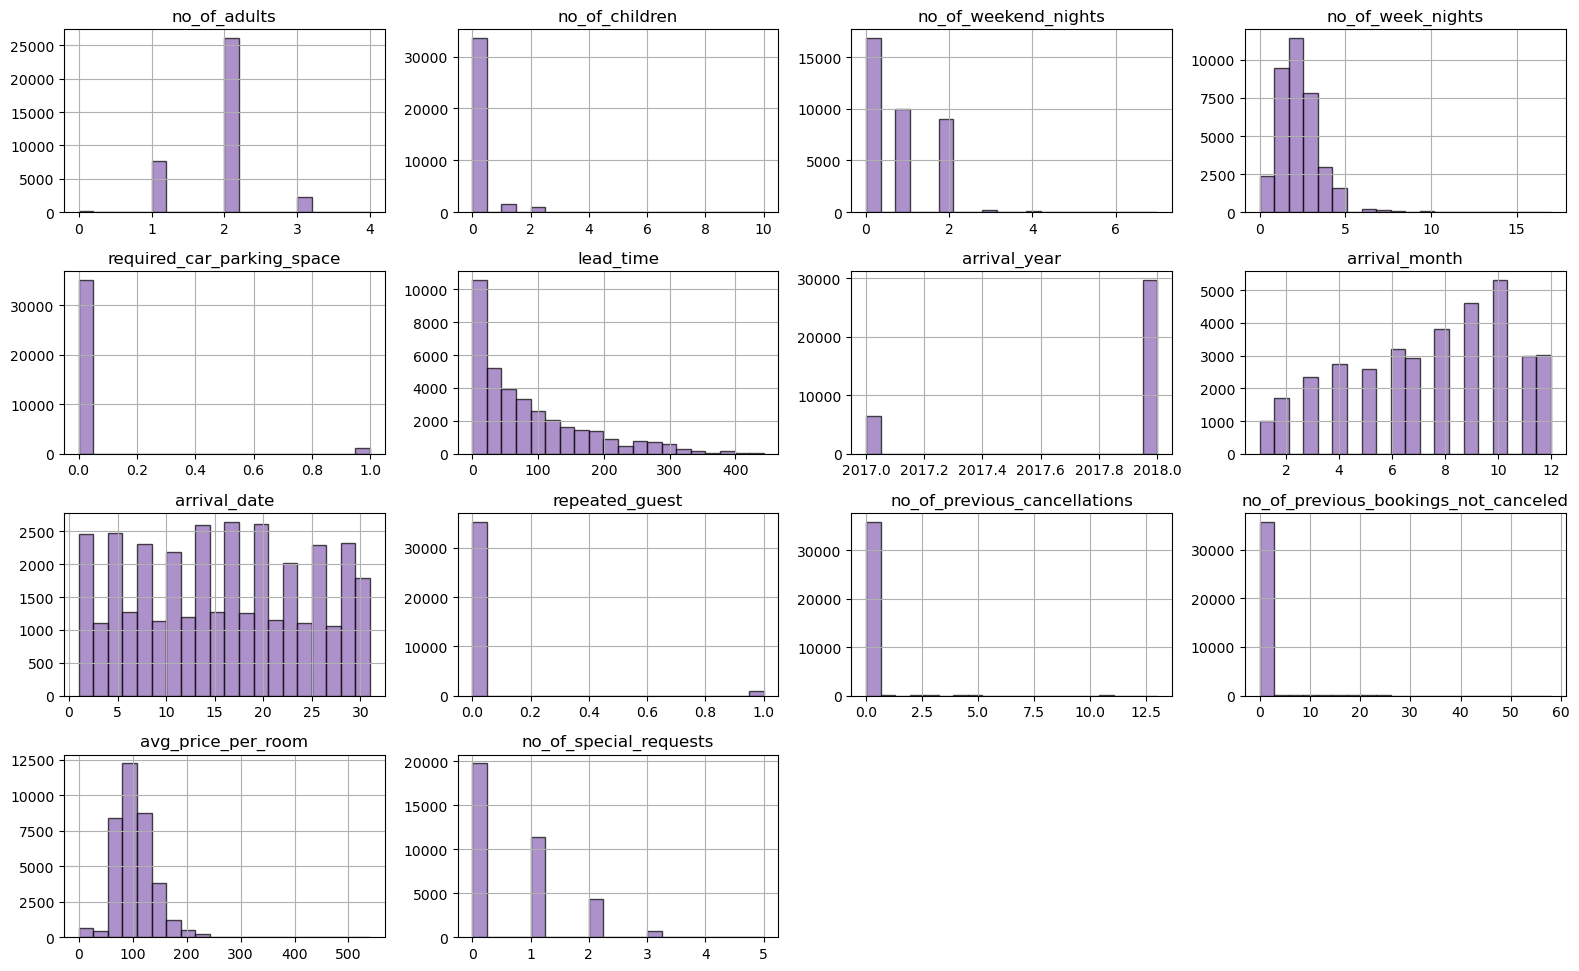

In [11]:
df.hist(bins=20, figsize=(16, 12), color='#8a63b4', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

+ Se observa el número total de **valores únicos** en las columnas categóricas.

In [12]:
display(df[cat_col].nunique())

Booking_ID             36275
type_of_meal_plan          4
room_type_reserved         7
market_segment_type        5
booking_status             2
dtype: int64

In [13]:
# Valores únicos de cada columna categórica
print('\'type_of_meal_plan\':\n', df['type_of_meal_plan'].unique())
print('\n\'room_type_reserved\':\n', df['room_type_reserved'].unique())
print('\n\'market_segment_type\':\n', df['market_segment_type'].unique())
print('\n\'booking_status\':\n', df['booking_status'].unique())

'type_of_meal_plan':
 ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

'room_type_reserved':
 ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

'market_segment_type':
 ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

'booking_status':
 ['Not_Canceled' 'Canceled']


+ Se observan los **valores atípicos** de los atributos con desviación estandar mayor a 10.

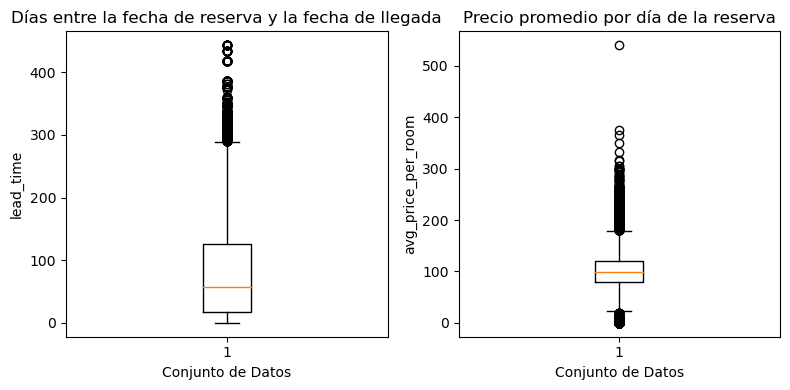

In [14]:
# Se crea un gráfico de dos boxplots
plt.figure(figsize=(8, 4))  

# Boxplot para lead_time
plt.subplot(1, 2, 1)  # Subgráfico 1 de 2
plt.boxplot(df['lead_time'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('lead_time')
plt.title("Días entre la fecha de reserva y la fecha de llegada") 

# Boxplot para avg_price_per_room
plt.subplot(1, 2, 2)  # Subgráfico 2 de 2
plt.boxplot(df['avg_price_per_room'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('avg_price_per_room')
plt.title("Precio promedio por día de la reserva")  

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

+ Se observa la **distribución de las clases**.

<Axes: ylabel='booking_status'>

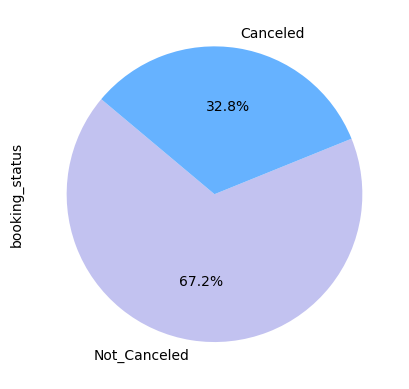

In [15]:
#Definimos colores pasteles (morado, azul y verde)
colors = ['#c2c2f0', '#66B2FF', '#99FF99']

#Gráfico de pastel
df['booking_status'].value_counts().plot(kind = "pie", colors = colors, 
                                         autopct='%1.1f%%', startangle=140)

**Observaciones después de explorar los datos:**

+ El dataset consta de 19 atributos y 36,275 instancias.
+ No se encuentran valores nulos ni filas duplicadas en el conjunto de datos.
+ Los datos corresponden a reservaciones desde el 01/01/2017 hasta el 31/12/2018.
+ Hay 5 atributos categóricos y 14 atributos numéricos.
+ Las columnas _type_of_meal_plan_ y _room_type_reserved_ no siguen el formato Cobra Case como el resto de las columnas categóricas.
+ Se consideran como valores atípicos las reservaciones realizadas con una antelación de 300 días o más, así como las habitaciones con precios superiores a 190 euros o inferiores a aproximadamente 30 euros. Sin embargo, se opta por mantenerlos en el conjunto de datos, ya que pueden ser relevantes para el modelo.

### <font color='navy'> **2. Procesamiento de datos** </font>

#### <font color='navy'> **2.1 Limpieza de datos** </font>

#### <font color='purple'> **Eliminación de datos redundantes** </font>

Los datos de la columna Booking_ID están compuestos por el prefijo INN seguido por el índice de la reservación. Este índice coincide con el índice del dataframe, con la única diferencia de que el dataframe comienza desde 0, mientras que el índice de la reservación empieza en 1. Debido a esto, consideramos que esta columna es redundante y procedemos a eliminarla.

In [13]:
df = df.drop('Booking_ID', axis = 1)
df.shape

(36275, 18)

#### <font color='purple'> **Estandarización** </font>

Realizamos la estandarización de los datos categóricos mediante la conversión al estilo de escritura Cobra Case, que es un formato en el cual la primera letra de cada palabra se escribe en mayúscula y los espacios se reemplazan por el carácter de subrayado (_).

Es importante notar que las columnas _market_segment_type_ y _booking_status_ ya están en formato Cobra Case, por lo que solo estandarizamos las columnas _type_of_meal_plan_ y _room_type_reserved_.

In [14]:
#Estandariza type_of_meal_plan a Cobra Case
df['type_of_meal_plan'] = pd.Series(df['type_of_meal_plan']).str.split().str.join('_')

#Estandariza room_type_reserved a Cobra Case
df['room_type_reserved'] = pd.Series(df['room_type_reserved']).str.split().str.join('_')

# Se muestran de nuevo los valores únicos de cada columna 
print('\'type_of_meal_plan\':\n', df['type_of_meal_plan'].unique())
print('\n\'room_type_reserved\':\n', df['room_type_reserved'].unique())

'type_of_meal_plan':
 ['Meal_Plan_1' 'Not_Selected' 'Meal_Plan_2' 'Meal_Plan_3']

'room_type_reserved':
 ['Room_Type_1' 'Room_Type_4' 'Room_Type_2' 'Room_Type_6' 'Room_Type_5'
 'Room_Type_7' 'Room_Type_3']


#### <font color='purple'> **Conversión de tipo de datos** </font>

Observemos que los valores únicos en las columnas _type_of_meal_plan_, _room_type_reserved_ y _booking_status_ pueden ser convertidos en valores numéricos de la siguiente manera:

1. **type_of_meal_plan:** Cada plan de comida puede ser etiquetado como 1, 2 o 3 respectivamente, con un valor de 0 en caso de no haber seleccionado un plan de comida.

In [15]:
#Pasamos la columna type_of_meal_plan a la serie convert_meal_plan
convert_meal_plan = pd.Series(df['type_of_meal_plan'])

#Reemplazamos el dato Meal_Plan_i por i 
for i in range (4):
    convert_meal_plan = convert_meal_plan.replace('Meal_Plan_' + str(i), i)   
#Reemplazamos el dato Not_Selected por 0
convert_meal_plan = convert_meal_plan.replace('Not_Selected', 0)

#Reemplazamos la columna type_of_meal_plan por la serie convert_meal_plan
df['type_of_meal_plan'] = convert_meal_plan

# Se muestran los nuevos valores únicos de la columna type_of_meal_plan
print('\'type_of_meal_plan\':\n', df['type_of_meal_plan'].unique())

'type_of_meal_plan':
 [1 0 2 3]


2. **room_type_reserved:** Dado que existen 7 tipos de habitaciones, cada una puede ser representada con los valores 1, 2, 3, 4, 5, 6 y 7 respectivamente.

In [16]:
#Pasamos la columna room_type_reserved a la serie convert_room
convert_room = pd.Series(df['room_type_reserved'])

#Reemplazamos el dato Room_Type_i por i 
for i in range (8):
    convert_room = convert_room.replace('Room_Type_' + str(i), i)   
    
#Reemplazamos la columna room_type_reserved por la serie convert_room
df['room_type_reserved'] = convert_room

# Se muestran los nuevos valores únicos de la columna room_type_reserved
print('\'room_type_reserved\':\n', df['room_type_reserved'].unique())

'room_type_reserved':
 [1 4 2 6 5 7 3]


3. **booking_status:** El estado de la reservación puede ser categorizado como "Canceled" o "Not_Canceled" por lo que se les pueden asignar los valores 0 - Cancelada, 1 - No cancelada.

In [17]:
#Reemplazamos los dos estados de la reservación por 0 y 1 respectivamente
df['booking_status'] = pd.Series(df['booking_status']).replace('Canceled', 0)
df['booking_status'] = pd.Series(df['booking_status']).replace('Not_Canceled', 1)

# Se muestran los nuevos valores únicos de la columna booking_status
print('\'booking_status\':\n', df['booking_status'].unique())

'booking_status':
 [1 0]


Para mayor conveniencia, también convertiremos la columna _market_segment_type_ en valores numéricos para facilitar el procesamiento de los datos. Sin embargo, es importante destacar que estos valores son originalmente cualitativos nominales, lo que significa que no tienen un valor cuantitativo y su orden no es relevante.

4. **market_segment_type:** Por razones de simplicidad, asignaremos valores numéricos del 1 al 5 respectivamente a cada categoría. 

In [18]:
#Reemplazamos las categorías por números del 1 al 7 respectivamente
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Offline', 1)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Online', 2)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Corporate', 3)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Aviation', 4)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Complementary', 5)

Notemos que ahora las columnas originalmente categóricas contienen valores numéricos por lo que podemos observar la estructura descriptiva de los datos. 

In [19]:
new_numeric_columns = ['type_of_meal_plan','room_type_reserved',
                       'market_segment_type', 'booking_status']
display(df[new_numeric_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   type_of_meal_plan    36275 non-null  int64
 1   room_type_reserved   36275 non-null  int64
 2   market_segment_type  36275 non-null  int64
 3   booking_status       36275 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


None

In [23]:
display(df[new_numeric_columns].describe())

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000
mean,0.949966,1.708890,1.804604,0.672364
std,0.480191,1.399851,0.646881,0.469358
min,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000
max,3.000000,7.000000,5.000000,1.000000


Contamos ahora con solo columnas numéricas en el dataframe.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

#### <font color='navy'> **2.2 Aumento de datos** </font>

En el análisis exploratorio de los datos se observó que hay menos reservaciones canceladas que no canceladas. Este desequilibrio en las clases puede ocasionar que los modelos de Machine Learning se sesguen hacia la clase con más instancias. Para evitar este sobreajuste a los datos originales, recurriremos al aumento de datos.

In [20]:
print('Número de reservaciones no canceladas:\t', (df['booking_status'] == 1).sum())
print('Número de reservaciones canceladas:\t', (df['booking_status'] == 0).sum())
print('Diferencia de instancias entre clases:\t',
      (df['booking_status'] == 1).sum() - (df['booking_status'] == 0).sum())

Número de reservaciones no canceladas:	 24390
Número de reservaciones canceladas:	 11885
Diferencia de instancias entre clases:	 12505


De lo anterior, podemos observar que es necesario generar 12505 instancias de reservaciones canceladas para balancear las clases. 

In [26]:
# Se guarda el dataset procesado sin aumento en un archivo csv
df.to_csv('ProcessedHotelReservations.csv', index=False)

#### <font color='purple'> **Synthetic Minority Over-sampling Technique (SMOTE)** </font>

Para abordar este problema, se utilizará una técnica de sobremuestreo (oversampling) llamada _Synthetic Minority Over-sampling Technique_ (SMOTE), la cual crea muestras sintéticas mediante la interpolación entre ejemplos de la clase minoritaria.

Es importante tener en cuenta que la evaluación del modelo resultante no debe llevarse a cabo utilizando datos sintéticos. Por lo tanto, definiremos una función que realice el aumento de datos con la técnica SMOTE y devuelva tres dataframes:

+ _df_resampled:_ Un DataFrame con clases balanceadas que contiene tanto datos originales como sintéticos.
+ _df:_ Un DataFrame con los datos originales sin aumento.
+ _df_synthetic:_ Un DataFrame con los datos sintéticos generados durante el proceso de aumento de datos.

In [21]:
def data_augmentation_synthetic_data_SMOTE(df):
    
    # Se divide el conjunto de datos en variables independientes (X) y variable dependiente (y)
    X = df.drop('booking_status', axis=1)
    y = df['booking_status']
    
    # Se aplica la técnica SMOTE para aumentar la clase minoritaria
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Se crea un DataFrame a partir de las variables independientes aumentadas
    df_X = pd.DataFrame(X_resampled, columns=X.columns)

    # Se crea un DataFrame a partir de la variable dependiente aumentada
    df_y = pd.DataFrame(y_resampled, columns=['booking_status'])

    # Se combinan los DataFrames aumentados
    df_resampled = pd.concat([df_X, df_y], axis=1)

    # Se guardan los datos sintéticos en un dataframe calculando la diferencia entre df_resampled y df 
    df_synthetic = df_resampled.loc[~df_resampled.index.isin(df.index)]
    
    return df_resampled, df, df_synthetic

In [22]:
df_resampled, df, df_synthetic = data_augmentation_synthetic_data_SMOTE(df)

+ Observemos la **distribución de las clases**.

<Axes: ylabel='booking_status'>

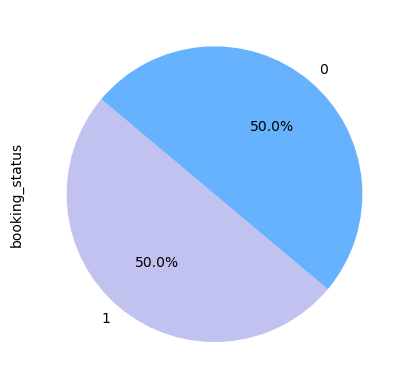

In [29]:
#Definimos colores pasteles (morado, azul y verde)
colors = ['#c2c2f0', '#66B2FF', '#99FF99']

#Gráfico de pastel
df_resampled['booking_status'].value_counts().plot(kind = "pie", colors = colors, 
                                         autopct='%1.1f%%', startangle=140)

In [30]:
print('Número de reservaciones no canceladas:\t', (df_resampled['booking_status'] == 1).sum())
print('Número de reservaciones canceladas:\t', (df_resampled['booking_status'] == 0).sum())
print('Diferencia de instancias entre clases:\t',
      (df_resampled['booking_status'] == 1).sum() - (df_resampled['booking_status'] == 0).sum())

Número de reservaciones no canceladas:	 24390
Número de reservaciones canceladas:	 24390
Diferencia de instancias entre clases:	 0


Las clases ahora están balanceadas.
Observemos la estructura descriptiva de los datos antes y después del aumento.

In [31]:
# Se calculan las estadísticas descriptivas para df y df_resampled
df_stats = df.describe()
df_resampled_stats = df_resampled.describe()

# Se seleccionan las estadísticas clave (media, mediana y desviación estándar)
key_stats = ['mean', '50%', 'std']

# Se unen las estadísticas descriptivas de df y df_resampled en un solo dataframe
df_compare = pd.concat([df_stats.loc[key_stats], df_resampled_stats.loc[key_stats]], 
                      keys=['Original', 'Aumentada'], axis=0)

# Se muestra la comparación
print("Comparación de estadísticas descriptivas (media, mediana y desviación estándar):")
display(df_compare.T)

Comparación de estadísticas descriptivas (media, mediana y desviación estándar):


Original                      \
                                             mean      50%        std   
no_of_adults                             1.844962     2.00   0.518715   
no_of_children                           0.105279     0.00   0.402648   
no_of_weekend_nights                     0.810724     1.00   0.870644   
no_of_week_nights                        2.204300     2.00   1.410905   
type_of_meal_plan                        0.949966     1.00   0.480191   
required_car_parking_space               0.030986     0.00   0.173281   
room_type_reserved                       1.708890     1.00   1.399851   
lead_time                               85.232557    57.00  85.930817   
arrival_year                          2017.820427  2018.00   0.383836   
arrival_month                            7.423653     8.00   3.069894   
arrival_date                            15.596995    16.00   8.740447   
market_segment_type                      1.804604     2.00   0.646881   
repeated_guest                           0.025637     0.00   0.158053   
no_of_previous_cancellations             0.023349     0.00   0.368331   
no_of_previous_bookings_not_canceled     0.153411     0.00   1.754171   
avg_price_per_room                     103.423539    99.45  35.089424   
no_of_special_requests                   0.619655     0.00   0.786236   
booking_status                           0.672364     1.00   0.469358   

                                        Aumentada                     
                                             mean     50%        std  
no_of_adults                             1.837208     2.0   0.507963  
no_of_children                           0.096248     0.0   0.384330  
no_of_weekend_nights                     0.773985     1.0   0.850535  
no_of_week_nights                        2.178946     2.0   1.386848  
type_of_meal_plan                        0.936060     1.0   0.500099  
required_car_parking_space               0.023391     0.0   0.151143  
room_type_reserved                       1.694711     1.0   1.372738  
lead_time                               98.697089    71.0  92.032468  
arrival_year                          2017.838294  2018.0   0.368184  
arrival_month                            7.345244     8.0   2.948399  
arrival_date                            15.555617    16.0   8.721287  
market_segment_type                      1.781775     2.0   0.610560  
repeated_guest                           0.019188     0.0   0.137187  
no_of_previous_cancellations             0.018614     0.0   0.336431  
no_of_previous_bookings_not_canceled     0.114535     0.0   1.514704  
avg_price_per_room                     105.243891   101.0  34.416404  
no_of_special_requests                   0.508549     0.0   0.735778  
booking_status                           0.500000     0.5   0.500005

Comparemos ahora los **histogramas antes y después del aumento**.

Histogramas de los datos originales


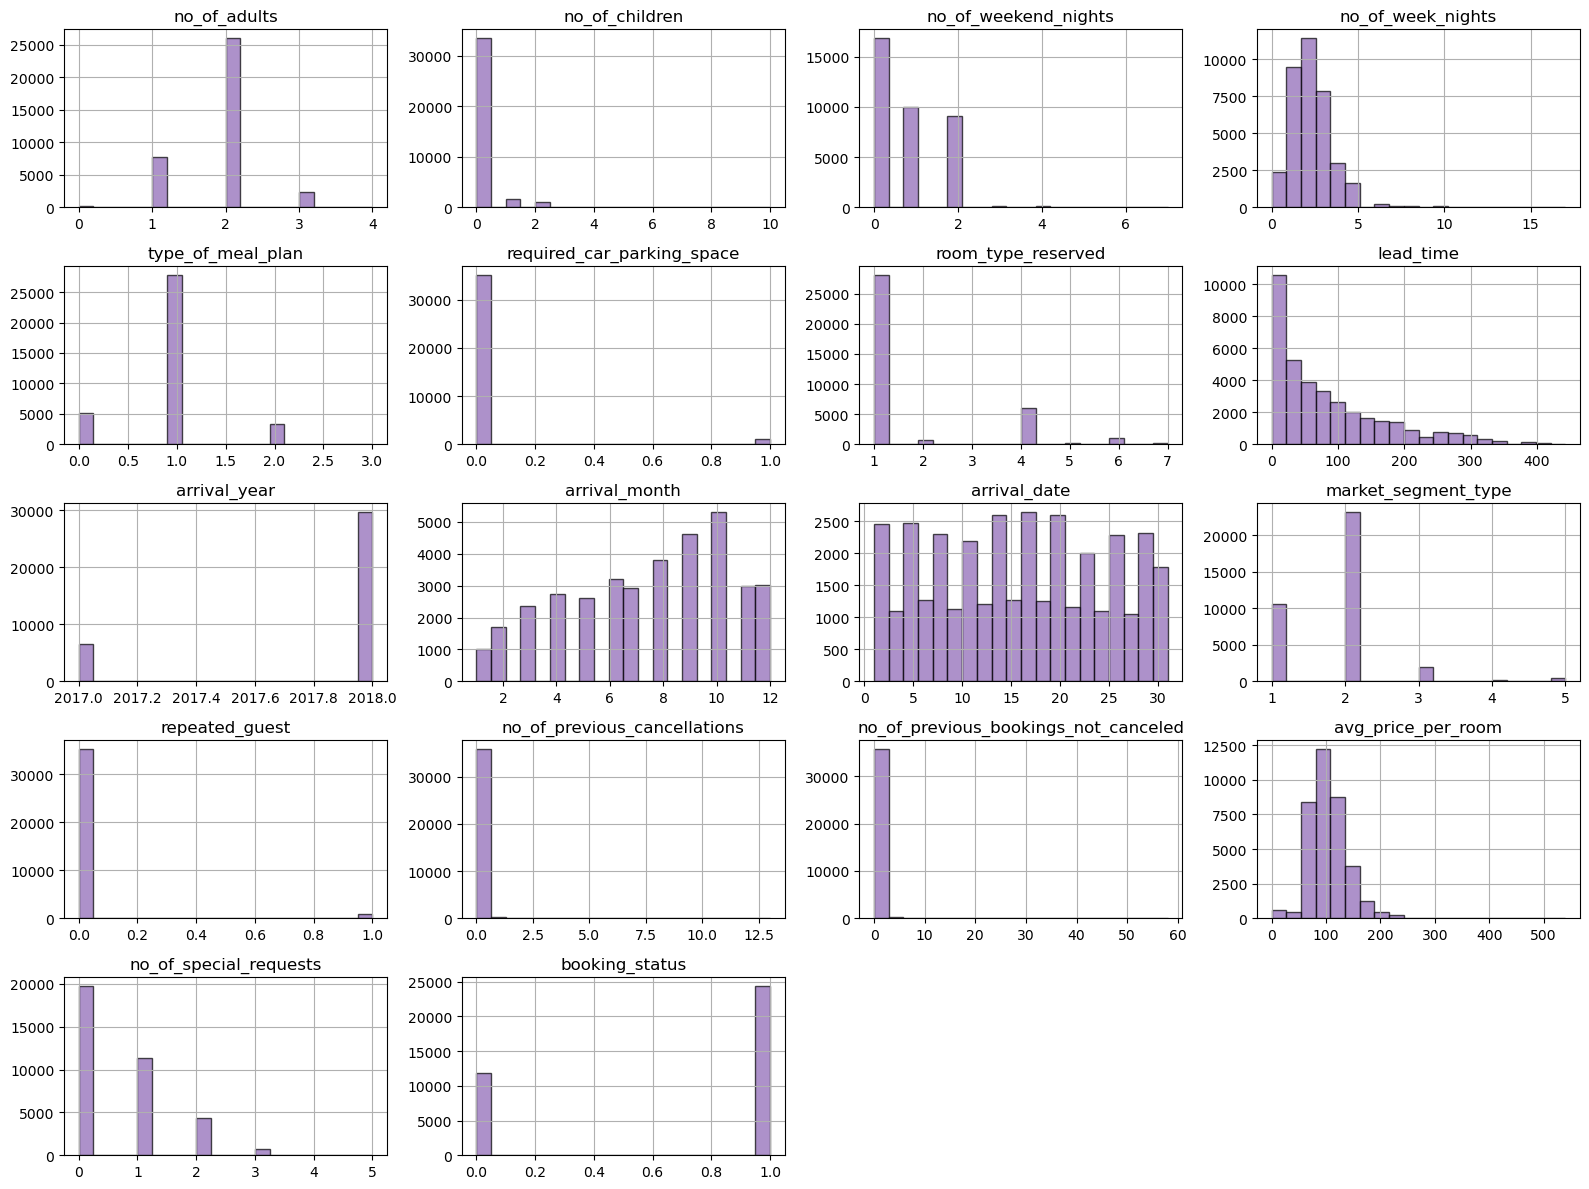

In [32]:
df.hist(bins=20, figsize=(16, 12), color='#8a63b4', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

print('Histogramas de los datos originales')
plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

Histogramas de los datos aumentados


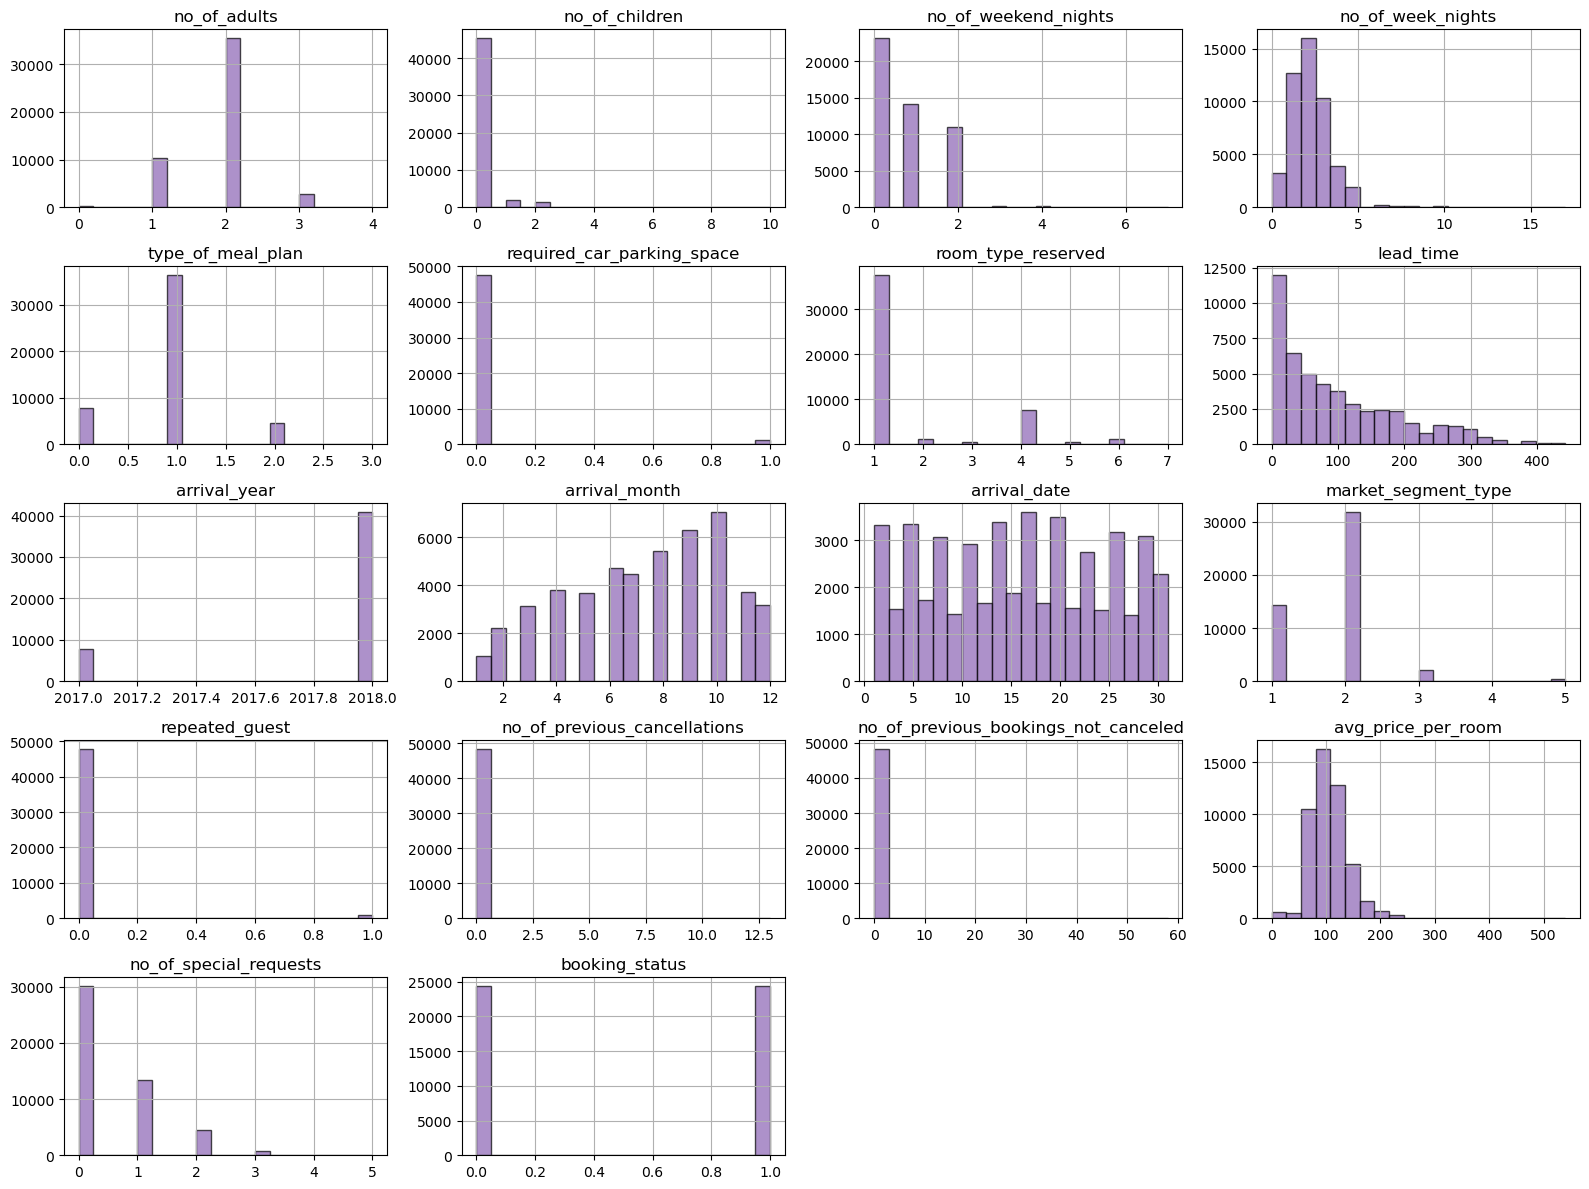

In [33]:
df_resampled.hist(bins=20, figsize=(16, 12), color='#8a63b4', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

print('Histogramas de los datos aumentados')
plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

**Observaciones:**

A partir de los histogramas anteriores, se puede observar que el comportamiento de los datos es consistente tanto antes como después del aumento de datos. Esto nos lleva a concluir que el conjunto de datos aumentado representa adecuadamente el comportamiento de los datos originales. Por lo tanto, procedemos a trabajar con los datos aumentados.

### <font color='navy'> **3. Construcción y evaluación de los modelos de clasificación** </font>

El objetivo en esta sección es construir y evaluar 5 modelos de clasificación, mostrar las respectivas matrices de confusión y comparar sus resultados con las siguientes métricas: 

1. **Exactitud (Accuracy)**: Mide la proporción de predicciones correctas en relación con el número total de predicciones. 

$$\text{Exactitud (Accuracy)} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}$$
   
2. **Sensibilidad (Recall)**: Mide la proporción de ejemplos positivos reales que fueron correctamente identificados por el modelo.  

$$\text{Sensibilidad (Recall)} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP) + Falsos Negativos (FN)}}$$


3. **Especificidad**: Mide la proporción de ejemplos negativos reales que fueron correctamente identificados por el modelo.

$$\text{Especificidad} = \frac{\text{Verdaderos Negativos (TN)}}{\text{Verdaderos Negativos (TN) + Falsos Positivos (FP)}}$$

Los algoritmos de inferencia a utilizar son los siguientes: 

+ **Árboles de Decisión (DecisionTreeClassifier):** Este algoritmo divide el conjunto de datos en subconjuntos basados en características específicas, creando una estructura de árbol en la que cada nodo representa una decisión basada en una característica.

+ **Naive Bayes (GaussianNB):** Un clasificador probabilístico que se basa en el teorema de Bayes y es "Naive" porque asume independencia entre características.

+ **KNN (KNeighborsClassifier):** Clasifica los puntos de datos en función de la mayoría de los k vecinos más cercanos en el espacio de características.

+ **SVM (SVC):** Máquinas de soporte vectorial que buscan encontrar un hiperplano que mejor separe las clases en un espacio de características.

+ **Regresión Logística (LogisticRegression):** Utilizada para problemas de clasificación, esta técnica modela la relación entre las características de entrada y la probabilidad de pertenecer a una clase.


La partición de los datos para la evaluación de los modelos se realizará con validación cruzada (_k=10_).

#### <font color='purple'> **Función para validación cruzada (kFold) con datos aumentados** </font>

Comencemos por definir la función _cross_val_predict_resampled_, que realizará una validación cruzada con datos aumentados. Como se mencionó anteriormente, la evaluación del modelo resultante no debe llevarse a cabo utilizando datos sintéticos. Esta función toma como entrada el modelo, los datos originales, los datos sintéticos y el número de "folds" (pliegues). Como salida, proporcionará las clases originales y las clases predichas, que se obtuvieron mediante la predicción de un modelo entrenado con datos originales y sintéticos.

In [34]:
def cross_val_predict_resampled(model, df, df_synthetic, num_folds):
    
    # Se divide el conjunto de datos en variables independientes y variable dependiente
    X = df.drop('booking_status', axis=1)
    y = df['booking_status']
    
    X_synthetic = df_synthetic.drop('booking_status', axis=1)
    y_synthetic = df_synthetic['booking_status']
    
    # Se crean objetos KFold para dividir los datos originales en k folds
    kf_original = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Se dividen los datos sintéticos en k folds
    kf_synthetic = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Almacena los folds de datos sintéticos en una lista
    synthetic_folds = []
    
    for train_index_synthetic, _ in kf_synthetic.split(X_synthetic):
        X_synthetic_fold = X_synthetic.iloc[train_index_synthetic]
        y_synthetic_fold = y_synthetic.iloc[train_index_synthetic]
        synthetic_folds.append((X_synthetic_fold, y_synthetic_fold))
        
    # Se inicializa una lista para almacenar las predicciones de cada fold
    predictions = []
    # Se inicializa una lista para almacenar las etiquetas originales
    labels = []

    # Realiza la validación cruzada y entrena el modelo con un fold de datos originales y un fold de datos sintéticos en cada fold
    for (train_index_original, test_index_original) in kf_original.split(X):
        X_train_original, X_test = X.iloc[train_index_original], X.iloc[test_index_original]
        y_train_original, y_test = y.iloc[train_index_original], y.iloc[test_index_original]

        # Se obtiene el fold de datos sintéticos correspondiente
        fold_index = len(predictions) % 10  # Se calcula el índice del fold de datos sintéticos
        X_synthetic_fold, y_synthetic_fold = synthetic_folds[fold_index]

        # Se combina un fold de datos originales con un fold de datos sintéticos para entrenar el modelo
        X_train = pd.concat([X_train_original, X_synthetic_fold], ignore_index=True)
        y_train = pd.concat([y_train_original, y_synthetic_fold], ignore_index=True)
        
        # Se ajusta el modelo en el conjunto de entrenamiento combinado de este fold
        model.fit(X_train, y_train)

        # Se realizan las predicciones en el conjunto de prueba (datos originales) de este fold
        fold_predictions = model.predict(X_test)

        # Se almacenan las predicciones y etiquetas de cada fold en las listas
        predictions.extend(fold_predictions)
        labels.extend(y_test)
    
    df_predictions = pd.Series(predictions)
    df_labels = pd.Series(labels)
    
    # Se regresan los datos originales con los datos predichos durante la validación cruzada
    return df_labels, df_predictions

#### <font color='purple'> **Función para imprimir las métricas de cada modelo** </font>

In [35]:
def print_model_metrics(model_name, accuracy, sensitivity, specificity, matrix):
            
        print(model_name + 
              '\nAccuracy: ' + str(accuracy) + 
              '\nSensibilidad: ' + str(sensitivity) + 
              '\nEspecificidad: ' + str(specificity) +
              '\nMatriz de confusión: \n' + str(matrix) + '\n')

#### <font color='purple'> **Función para evaluar los modelos mediante validación cruzada con kFold** </font>

**Nota:** Es importante mencionar que el orden por defecto de la [matriz de confusión calculada por scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) es el siguiente:

|                          | Negativos (Predicted)     | Positivos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Negativos (Actual)**   | Verdaderos Negativos (TN) | Falsos Positivos (FP)    |
| **Positivos (Actual)**   | Falsos Negativos (FN)     | Verdaderos Positivos (TP)|

Por lo tanto, será necesario modificar la posición de dichos valores para obtener la matriz de confusión en el siguiente orden, el cual es más intuitivo de interpretar:


|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | Verdaderos Positivos (TP) | Falsos Negativos (FN)    |
| **Negativos (Actual)**   | Falsos Positivos (FP)     | Verdaderos Negativos (TN)|



In [53]:
def cross_validation_classification_models(df, df_synthetic):
    
    models = {
        'Árboles de Decisión': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(), 
        'KNN': KNeighborsClassifier(n_neighbors=3),        
        'SVM': SVC(kernel='linear'),
        #'Random Forest': RandomForestClassifier(),
        'Regresión Logística': LogisticRegression(solver='lbfgs', max_iter=15000),
        #'Gradient Boosting': GradientBoostingClassifier(),
        #'XGBoost': xgb.XGBClassifier(),
        #'AdaBoost': AdaBoostClassifier(),
        #'SGD': SGDClassifier()
    }

    best_model = None
    best_model_name = None
    best_accuracy = 0
    best_sensitivity = 0
    best_specificity = 0
    
    #Evaluamos el rendimiento de cada modelo
    for model_name, model in models.items():
        
        # Utilizamos cross_val_predict para obtener las predicciones
        y, predicted = cross_val_predict_resampled(model, df, df_synthetic, 10)
        
        # Calculamos las métricas
        sklearn_matrix = confusion_matrix(y, predicted)
        matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                          [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
        TP = matrix[0, 0]
        FN = matrix[0, 1]
        FP = matrix[1, 0]
        TN = matrix[1, 1]
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        sensitivity = TP/(TP + FN)
        specificity = TN/(TN + FP)
        
        # Imprimimos las métricas
        print_model_metrics(model_name, accuracy, sensitivity, specificity, matrix)
        
        # Seleccionamos el modelo con mejores métricas
        if accuracy > best_accuracy:
            best_model = model
            best_model_name = model_name
            best_accuracy = accuracy
            best_sensitivity = sensitivity
            best_specificity = specificity
            best_matrix = matrix
    
    print('\nMEJOR MODELO\n')
    print_model_metrics(best_model_name, best_accuracy, best_sensitivity, best_specificity, best_matrix)
    
    fig = tree.plot_tree(best_model,
                     feature_names = df.columns,
                     class_names = ['False','True'],
                     filled=True)
    
    return best_model_name, best_model

#### <font color='purple'> **Construcción y evaluación de los 5 modelos de clasificación** </font>

Árboles de Decisión
Accuracy: 0.8750379048931771
Sensibilidad: 0.8837228372283723
Especificidad: 0.8572149768615902
Matriz de confusión: 
[[21554  2836]
 [ 1697 10188]]

Naive Bayes
Accuracy: 0.4163197794624397
Sensibilidad: 0.13866338663386635
Especificidad: 0.9861169541438788
Matriz de confusión: 
[[ 3382 21008]
 [  165 11720]]

KNN
Accuracy: 0.8203445899379738
Sensibilidad: 0.8058630586305863
Especificidad: 0.8500631047538915
Matriz de confusión: 
[[19655  4735]
 [ 1782 10103]]

SVM
Accuracy: 0.7731495520330807
Sensibilidad: 0.7918409184091841
Especificidad: 0.7347917543121582
Matriz de confusión: 
[[19313  5077]
 [ 3152  8733]]

Regresión Logística
Accuracy: 0.7692074431426602
Sensibilidad: 0.7825748257482574
Especificidad: 0.7417753470761465
Matriz de confusión: 
[[19087  5303]
 [ 3069  8816]]


MEJOR MODELO

Árboles de Decisión
Accuracy: 0.8750379048931771
Sensibilidad: 0.8837228372283723
Especificidad: 0.8572149768615902
Matriz de confusión: 
[[21554  2836]
 [ 1697 10188]]



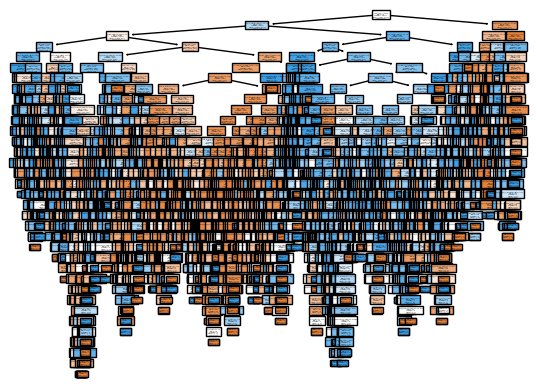

In [54]:
best_model_name, best_model = cross_validation_classification_models(df, df_synthetic)

**Observaciones:**

1. **Árboles de Decisión (DecisionTreeClassifier):** El 87.50% de las predicciones realizadas por el modelo creado con árboles de decisión son correctas. Además, el modelo identificó correctamente alrededor del 88.37% de los ejemplos positivos y cerca del 85.72% de los ejemplos negativos. Estos resultados sugieren que el modelo tiene un buen rendimiento en términos de exactitud, sensibilidad y especificidad, ya que estas tres métricas están equilibradas.

2. **Naive Bayes (GaussianNB):** El 41.63% de las predicciones realizadas por el modelo son correctas. Además, el modelo identificó correctamente alrededor del 13.86% de los ejemplos positivos y aproximadamente el 98.61% de los ejemplos negativos. Estos resultados sugieren que el modelo tiene un rendimiento muy bueno en la identificación de ejemplos negativos, pero es deficiente en la identificación de ejemplos positivos. Esto explica por qué su exactitud es notablemente baja.

3. **KNN (KNeighborsClassifier):** El 82.03% de las predicciones realizadas por el modelo son correctas. Además, el modelo identificó correctamente aproximadamente el 80.58% de los ejemplos positivos y cerca del 85.00% de los ejemplos negativos. Estos resultados sugieren que el modelo tiene un buen rendimiento en términos de exactitud, sensibilidad y especificidad, ya que estas tres métricas están equilibradas. No obstante, su rendimiento es inferior al obtenido con Árboles de Decisión.

4. **SVM (SVC):** El 77.31% de las predicciones realizadas por el modelo son correctas. Además, el modelo identificó correctamente aproximadamente el 79.18% de los ejemplos positivos y cerca del 73.47% de los ejemplos negativos. Estos resultados sugieren que las métricas están relativamente equilibradas; no obstante, el modelo es ligeramente mejor en la identificación de ejemplos positivos que en la identificación de ejemplos negativos. Además, su rendimiento es inferior al obtenido con KNN y Árboles de Decisión.

5. **Regresión Logística (LogisticRegression):** El 76.92% de las predicciones realizadas por el modelo son correctas. Además, el modelo identificó correctamente aproximadamente el 78.25% de los ejemplos positivos y cerca del 74.17% de los ejemplos negativos. Estos resultados sugieren que el modelo tiene un buen rendimiento en términos de exactitud, sensibilidad y especificidad, ya que estas tres métricas están equilibradas. No obstante, su rendimiento es inferior al obtenido con SVM, KNN, Árboles de Decisión y Random Forest.


En conclusión, de los cinco modelos de inferencia de clasificación (árboles de decisión, Naive Bayes, kNN, SVM y Regresión Logística) árboles de decisión fue el mejor modelo.

### <font color='navy'> **4. Reducción de dimensionalidad de los datos** </font>

Procedemos a realizar reducción de dimensionalidad sobre los datos originales y posteriormente aumentar dichos datos, esto con el fin de hacer una comparación justa entre los modelos entrenados con datos aumentados originales, y datos aumentados con dimensionalidad reducida. 

Se utilizó la herramienta [Orange](https://orangedatamining.com/) para obtener el número de componentes con los cuales se obtenía una varianza acumulada del 90%. Dado que este número de componentes fue igual a 13, procedemos a reducir los datos utilizando las técnicas PCA y UMAP.

In [38]:
#Reducción de dimensionalidad sobre los datos originales

# Se divide el conjunto de datos original en variables independientes (X) y variable dependiente (y)
#X = df.drop('booking_status', axis=1)
#y = df['booking_status']

#### <font color='purple'> **PCA** </font>

In [39]:
#Función para aplicar PCA para 13 componentes sobre X 
#X_PCA = PCA(n_components=13).fit_transform(X)

#df_X_PCA = pd.DataFrame(X_PCA, columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 
#                                        'C8', 'C9', 'C10', 'C11', 'C12', 'C13'])
#y = pd.DataFrame(y, columns=['booking_status'])

#df_PCA = pd.concat([df_X_PCA, y], axis=1)

In [40]:
# Se guarda el dataset reducido con PCA en un archivo csv
#df_PCA.to_csv('ReducedPCA.csv', index=False)

In [41]:
df_PCA = pd.read_csv('ReducedPCA.csv')

In [42]:
#Aumento de datos 
df_resampled_PCA, df_PCA, df_synthetic_PCA = data_augmentation_synthetic_data_SMOTE(df_PCA)

#### <font color='purple'> **UMAP** </font>

In [43]:
#Función para aplicar UMAP para 13 componentes sobre X 
#X_UMAP = UMAP(n_neighbors=2, min_dist=0.1, metric='correlation', n_components=13).fit_transform(X)

In [44]:
#df_X_UMAP = pd.DataFrame(X_UMAP, columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 
#                                          'C8', 'C9', 'C10', 'C11', 'C12', 'C13'])
#y = pd.DataFrame(y, columns=['booking_status'])

#df_UMAP = pd.concat([df_X_UMAP, y], axis=1)

In [45]:
# Se guarda el dataset reducido con UMAP en un archivo csv
#df_UMAP.to_csv('ReducedUMAP.csv', index=False)

In [46]:
df_UMAP = pd.read_csv('ReducedUMAP.csv')

In [47]:
#Aumento de datos 
df_resampled_UMAP, df_UMAP, df_synthetic_UMAP = data_augmentation_synthetic_data_SMOTE(df_UMAP)

### <font color='navy'> **5. Comparación del rendimiento del mejor modelo utilizando los datos en su dominio original y en un espacio modificado** </font>

Comparación del rendimiento de los modelos utilizando los datos en su dominio original, respecto al utilizar los datos en un espacio modificado. 

#### <font color='purple'> **Función para imprimir las métricas de cada dataset** </font>

In [55]:
def print_data_metrics(dataset_name, model_name, accuracy, sensitivity, specificity, matrix):
            
        print(dataset_name + 
              '\nModelo: ' + model_name + 
              '\nAccuracy: ' + str(accuracy) + 
              '\nSensibilidad: ' + str(sensitivity) + 
              '\nEspecificidad: ' + str(specificity) +
              '\nMatriz de confusión: \n' + str(matrix) + '\n')

#### <font color='purple'> **Función para evaluar los datasets mediante validación cruzada con kFold** </font>

In [56]:
def cross_validation_original_and_reduced_data(model, model_name, df, df_synthetic, df_reduced, df_synthetic_reduced):

    original_datasets = {
        'Original': df,
        'Reducidos': df_reduced, 
    }
    
    synthetic_datasets = {
        'Sintéticos Originales': df_synthetic,
        'Sintéticos Reducidos': df_synthetic_reduced
    }

    best_dataset = None
    best_accuracy = 0
    best_sensitivity = 0
    best_specificity = 0
    best_matrix = None
    
    #Evaluamos el rendimiento de cada dataset
    for original_data_name, original_data in original_datasets.items():
        for synthetic_data_name, synthetic_data in synthetic_datasets.items():
            
            if (original_data_name, synthetic_data_name) == ('Original', 'Sintéticos Originales') or (original_data_name, synthetic_data_name) == ('Reducidos', 'Sintéticos Reducidos'):

                # Utilizamos cross_val_predict para obtener las predicciones
                y, predicted = cross_val_predict_resampled(model, original_data, synthetic_data, 10)

                # Calculamos las métricas
                sklearn_matrix = confusion_matrix(y, predicted)
                matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                                  [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
                TP = matrix[0, 0]
                FN = matrix[0, 1]
                FP = matrix[1, 0]
                TN = matrix[1, 1]
                accuracy = (TP + TN)/(TP + TN + FP + FN)
                sensitivity = TP/(TP + FN)
                specificity = TN/(TN + FP)

                print_data_metrics(original_data_name, model_name, accuracy, sensitivity, specificity, matrix)

                # Seleccionamos el dataset con mejores métricas
                if accuracy > best_accuracy:
                    best_dataset_name = original_data_name
                    best_accuracy = accuracy
                    best_sensitivity = sensitivity
                    best_specificity = specificity
                    best_matrix = matrix
    
    print('\nMEJOR DATASET\n')
    print_data_metrics(best_dataset_name, model_name, best_accuracy, best_sensitivity, best_specificity, best_matrix)

#### <font color='purple'> **Originales vs PCA** </font>

In [50]:
cross_validation_original_and_reduced_data(best_model, best_model_name, df, df_synthetic, df_PCA, df_synthetic_PCA)

Original
Modelo: Árboles de Decisión
Accuracy: 0.8754238456237078
Sensibilidad: 0.8846248462484625
Especificidad: 0.856541859486748
Matriz de confusión: 
[[21576  2814]
 [ 1705 10180]]

Reducidos
Modelo: Árboles de Decisión
Accuracy: 0.8589662301860785
Sensibilidad: 0.8693316933169332
Especificidad: 0.8376945729911653
Matriz de confusión: 
[[21203  3187]
 [ 1929  9956]]


MEJOR DATASET

Original
Modelo: Árboles de Decisión
Accuracy: 0.8754238456237078
Sensibilidad: 0.8846248462484625
Especificidad: 0.856541859486748
Matriz de confusión: 
[[21576  2814]
 [ 1705 10180]]



**Observaciones:** 
+ Las métricas de los datos reducidos son ligeramente inferiores a las métricas de los datos originales. La reducción de dimensionalidad puede haber llevado a una pérdida de información, lo que afecta el rendimiento del modelo. Sin embargo, los valores siguen siendo bastante buenos en ambos casos.

#### <font color='purple'> **Originales vs UMAP** </font>

In [51]:
cross_validation_original_and_reduced_data(best_model, best_model_name, df, df_synthetic, df_UMAP, df_synthetic_UMAP)

Original
Modelo: Árboles de Decisión
Accuracy: 0.8749552033080634
Sensibilidad: 0.8838458384583846
Especificidad: 0.8567101388304585
Matriz de confusión: 
[[21557  2833]
 [ 1703 10182]]

Reducidos
Modelo: Árboles de Decisión
Accuracy: 0.8040248104755341
Sensibilidad: 0.8400984009840098
Especificidad: 0.7299957930164073
Matriz de confusión: 
[[20490  3900]
 [ 3209  8676]]


MEJOR DATASET

Original
Modelo: Árboles de Decisión
Accuracy: 0.8749552033080634
Sensibilidad: 0.8838458384583846
Especificidad: 0.8567101388304585
Matriz de confusión: 
[[21557  2833]
 [ 1703 10182]]



**Observaciones:**
+ La reducción de dimensionalidad ha tenido un impacto más significativo en este caso. La exactitud, sensibilidad y especificidad disminuyen considerablemente con los datos reducidos en comparación con los datos originales. Esto indica que la reducción de dimensionalidad ha afectado negativamente el rendimiento del modelo. Los valores siguen siendo razonables, pero hay una pérdida de rendimiento en la clasificación con datos reducidos.

+ Al comparar los datos originales con los datos reducidos mediante PCA, se observan ligeras diferencias en las métricas del conjunto de datos original en comparación con las métricas obtenidas al realizar la misma comparación utilizando UMAP. Estas diferencias se deben a que Random Forest es un algoritmo basado en la agregación de múltiples árboles de decisión, y cada uno de estos árboles se entrena utilizando una selección aleatoria de características. Debido a esta naturaleza estocástica, cada vez que se entrena un modelo con Random Forest, se obtiene un conjunto de árboles ligeramente diferente, lo que conlleva a la obtención de resultados ligeramente distintos en términos de precisión, sensibilidad y especificidad, a pesar de utilizar el mismo conjunto de datos para entrenar el modelo.

+ Al comparar los datos originales con los datos reducidos mediante PCA y UMAP, se observa que los datos en su dominio original logran un mejor rendimiento.

### <font color='navy'> **6. Construcción y evaluación de los modelos de ensamble** </font>

Los meta-modelos de inferencia a utilizar son los siguientes: 

+ **Gradient Boosting (GradientBoostingClassifier):** Mejora la precisión de un modelo combinando secuencialmente múltiples modelos débiles. Cada nuevo modelo se enfoca en corregir los errores de los modelos anteriores, lo que resulta en un aumento gradual en la precisión del conjunto de modelos. 

+ **XGBoost (xgb.XGBClassifier):** Una implementación mejorada de Gradient Boosting, conocida por su eficiencia y rendimiento.

+ **Bagging - Bootstrap Aggregating (BaggingClassifier):** Bagging es una técnica de ensamblaje que utiliza múltiples instancias del mismo modelo base, entrenadas en paralelo en subconjuntos aleatorios de datos, y combina sus predicciones para mejorar la precisión del modelo. Este proceso en paralelo acelera el entrenamiento y reduce la varianza del modelo.

+ **Stacking (StackingCVClassifier):** Combina múltiples modelos base utilizando un meta-modelo. Cada modelo base contribuye con sus predicciones, y el meta-modelo aprende a combinar esas predicciones para mejorar la precisión. A diferencia de Bagging y Gradient Boosting, que se centran en un solo tipo de modelo, Stacking puede utilizar diversos modelos base.

+ **Voting (VotingClassifier):** Combina las predicciones de múltiples modelos base mediante votación. Cada modelo base emite su predicción y la decisión final se toma por mayoría de votos.

+ **AdaBoost (AdaBoostClassifier):** Se enfoca en ejemplos mal clasificados en iteraciones anteriores para mejorar la precisión del modelo. En cada iteración, asigna más peso a los ejemplos mal clasificados, lo que permite que los modelos se centren en corregir los errores anteriores. Esta adaptabilidad a los errores anteriores permite mejorar la precisión, especialmente cuando los modelos base son más simples.

+ **Random Forest (RandomForestClassifier):** Es una técnica de ensamblaje que combina múltiples árboles de decisión, donde cada árbol se entrena en un subconjunto aleatorio de datos. Luego, las predicciones de todos los árboles se combinan para mejorar la precisión del modelo. Esta técnica reduce la varianza y aumenta la precisión, y funciona de manera eficiente, ya que los árboles se construyen en paralelo.

#### <font color='purple'> **Función para validación cruzada con _StratifiedShuffleSplit_** </font>

_StratifiedShuffleSplit_ difiere de _kFold_ en el sentido de que estratifica los datos antes de realizar la división, lo que significa que conserva la proporción de clases en cada pliegue. 

In [33]:
def validation_predict_resampled(model, df, df_synthetic, num_folds):
    
    # Se divide el conjunto de datos en variables independientes y variable dependiente
    X = df.drop('booking_status', axis=1)
    y = df['booking_status']
    
    X_synthetic = df_synthetic.drop('booking_status', axis=1)
    y_synthetic = df_synthetic['booking_status']
    
    # Se crea un objeto StratifiedShuffleSplit para dividir los datos originales en folds estratificados
    sss = StratifiedShuffleSplit(n_splits=num_folds, test_size=1/num_folds, random_state=42)

    # Almacena los folds de datos sintéticos en una lista
    synthetic_folds = []
    
    for train_index_synthetic, _ in sss.split(X_synthetic, y_synthetic):
        X_synthetic_fold = X_synthetic.iloc[train_index_synthetic]
        y_synthetic_fold = y_synthetic.iloc[train_index_synthetic]
        synthetic_folds.append((X_synthetic_fold, y_synthetic_fold))
        
    # Se inicializa una lista para almacenar las predicciones de cada fold
    predictions = []
    # Se inicializa una lista para almacenar las etiquetas originales
    labels = []

    # Realiza la validación cruzada y entrena el modelo con un fold de datos originales y un fold de datos sintéticos en cada fold
    for train_index_original, test_index_original in sss.split(X, y):
        X_train_original, X_test = X.iloc[train_index_original], X.iloc[test_index_original]
        y_train_original, y_test = y.iloc[train_index_original], y.iloc[test_index_original]

        # Se obtiene el fold de datos sintéticos correspondiente
        fold_index = len(predictions) % num_folds  # Se calcula el índice del fold de datos sintéticos
        X_synthetic_fold, y_synthetic_fold = synthetic_folds[fold_index]

        # Se combina un fold de datos originales con un fold de datos sintéticos para entrenar el modelo
        X_train = pd.concat([X_train_original, X_synthetic_fold], ignore_index=True)
        y_train = pd.concat([y_train_original, y_synthetic_fold], ignore_index=True)
        
        # Se ajusta el modelo en el conjunto de entrenamiento combinado de este fold
        model.fit(X_train, y_train)

        # Se realizan las predicciones en el conjunto de prueba (datos originales) de este fold
        fold_predictions = model.predict(X_test)

        # Se almacenan las predicciones y etiquetas de cada fold en las listas
        predictions.extend(fold_predictions)
        labels.extend(y_test)
    
    df_predictions = pd.Series(predictions)
    df_labels = pd.Series(labels)
    
    # Se regresan los datos originales con los datos predichos durante la validación cruzada
    return df_labels, df_predictions

#### <font color='purple'> **Función para imprimir las métricas de cada meta modelo** </font>

In [34]:
def print_meta_model_metrics(model_name, f1, accuracy, sensitivity, specificity, matrix):
            
        print('\nModelo: ' + model_name + 
              '\nF1 Score: ' + str(f1) + 
              '\nAccuracy: ' + str(accuracy) + 
              '\nSensibilidad: ' + str(sensitivity) + 
              '\nEspecificidad: ' + str(specificity) +
              '\nMatriz de confusión: \n' + str(matrix) + '\n')

#### <font color='purple'> **Función para evaluar los modelos mediante validación cruzada con _StratifiedShuffleSplit_** </font>

In [31]:
def validation_meta_models(df, df_synthetic):
    
    clf1 = DecisionTreeClassifier()
    clf2 = GaussianNB()
    clf3 = KNeighborsClassifier(n_neighbors=3)
    clf4 = SVC()
    lr = LogisticRegression()
    
    models = {
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=10),
        'XGBoost': xgb.XGBClassifier(n_estimators=10),
        'Bagging': BaggingClassifier(n_estimators=10),
        'Stacking': StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4],
                                                      meta_classifier=lr,
                                                      random_state=24),
        'Voting (Hard)': VotingClassifier(estimators=[('dt', clf1), ('nb', clf2), ('kNN', clf3), ('svm', clf4)],
                                   voting='hard'),
        'AdaBoost': AdaBoostClassifier(n_estimators=10, random_state=0),
        'Random Forest': RandomForestClassifier(n_estimators=10, random_state=0)
    }

    best_model = None
    best_model_name = None
    best_f1_score = 0
    best_accuracy = 0
    best_sensitivity = 0
    best_specificity = 0
    scores = []
    
    #Evaluamos el rendimiento de cada modelo
    for model_name, model in models.items():
        
        # Obtenemos las predicciones
        y, predicted = validation_predict_resampled(model, df, df_synthetic, 10)
        
        # Calculamos las métricas
        sklearn_matrix = confusion_matrix(y, predicted)
        matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                          [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
        TP = matrix[0, 0]
        FN = matrix[0, 1]
        FP = matrix[1, 0]
        TN = matrix[1, 1]
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        sensitivity = TP/(TP + FN)
        specificity = TN/(TN + FP)
        f1 = f1_score(y, predicted, average='weighted')
        
        # Imprimimos las métricas
        print_meta_model_metrics(model_name, f1, accuracy, sensitivity, specificity, matrix)
        
        # Seleccionamos el modelo con mejores métricas
        if accuracy > best_accuracy:
            best_model = model
            best_model_name = model_name
            best_f1_score = f1
            best_accuracy = accuracy
            best_sensitivity = sensitivity
            best_specificity = specificity
            best_matrix = matrix
    
    print('\nMEJOR MODELO\n')
    print_meta_model_metrics(best_model_name, best_f1_score, best_accuracy, best_sensitivity, best_specificity, best_matrix)
    
    return best_model_name, best_model

In [18]:
validation_meta_models(df, df_synthetic)


Modelo: Gradient Boosting
F1 Score: 0.7819934914359437
Accuracy: 0.7764057331863286
Sensibilidad: 0.7644526445264452
Especificidad: 0.8009251471825063
Matriz de confusión: 
[[18645  5745]
 [ 2367  9523]]


Modelo: XGBoost
F1 Score: 0.8610273969820704
Accuracy: 0.8602811466372657
Sensibilidad: 0.8853628536285363
Especificidad: 0.8088309503784693
Matriz de confusión: 
[[21594  2796]
 [ 2273  9617]]


Modelo: Bagging
F1 Score: 0.8943338112397153
Accuracy: 0.8933020948180815
Sensibilidad: 0.9002460024600246
Especificidad: 0.87905803195963
Matriz de confusión: 
[[21957  2433]
 [ 1438 10452]]


Modelo: Stacking
F1 Score: 0.8764835387099406
Accuracy: 0.8752480705622933
Sensibilidad: 0.8862648626486265
Especificidad: 0.8526492851135408
Matriz de confusión: 
[[21616  2774]
 [ 1752 10138]]


Modelo: Voting (Hard)
F1 Score: 0.7379556947297091
Accuracy: 0.7308985667034179
Sensibilidad: 0.6260352603526035
Especificidad: 0.9460050462573592
Matriz de confusión: 
[[15269  9121]
 [  642 11248]]


Mode

('Random Forest', RandomForestClassifier(n_estimators=10, random_state=0))

Comparemos los resultados obtenidos con los del mejor modelo de clasificación previamente obtenido (Árboles de Decisión). Recordemos que los resultados del modelo fueron los siguientes:

- **Accuracy:** 0.8750
- **Sensibilidad:** 0.8837
- **Especificidad:** 0.8572
- **Matriz de Confusión:**

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 21554 (TP)                | 2836 (FN)                |
| **Negativos (Actual)**   | 1697 (FP)                 | 10188 (TN)               |

___________  
  
- Exactitud:
  - El modelo _Bagging_ tiene una exactitud del 89.33%, que es mayor que la del modelo de _Árboles de Decisión_ (87.50%).
  - El modelo _Random Forest_ también supera dicha exactitud con un valor del 89.67%.
  - El modelo _Stacking_ también supera la exactitud de _Árboles de Decisión_, con un valor del 87.52%

- Sensibilidad:
  - El modelo _XGBoost_ tiene una sensibilidad del 88.53%, que es mayor que la sensibilidad del modelo de _Árboles de Decisión_ (88.37%).
  - El modelo _Bagging_ tiene una sensibilidad del 90.02%, que también es superior.
  - El modelo _Stacking_ supera la sensibilidad del modelo de _Árboles de Decisión_ con un valor del 88.62%.
  - El modelo _Random Forest_ tiene una sensibilidad del 90.60%, que también es superior.

- Especificidad:
  - La especificidad del modelo _Bagging_ es del 87.90%, que es mayor que la del modelo de _Árboles de Decisión_ (85.72%).
  - El modelo _Voting_ también supera la especificidad del modelo de _Árboles de Decisión_, con un valor del 94.60%.
  - El modelo _Random Forest_ tiene una especificidad del 87.77%, la cual supera a la especificidad del modelo de _Árboles de Decisión_.

En resumen, tanto el modelo _Bagging_ como el modelo _Random Forest_ superan en términos de exactitud, sensibilidad y especificidad al modelo de _Árboles de Decisión_ previamente obtenido, lo que sugiere que podrían ser mejores opciones para realizar esta tarea de clasificación.

______________

**Observaciones:**

Analicemos las matrices de confusión de cada modelo de ensamble.

+ Gradient Boosting

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 18645 (TP)                | 5745 (FN)                |
| **Negativos (Actual)**   | 2367 (FP)                 | 9523 (TN)                |

El modelo de _Gradient Boosting_ muestra un número considerable de verdaderos positivos y negativos, pero también presenta errores en la clasificación de falsos positivos y falsos negativos.

+ XGBoost

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 21594 (TP)                | 2796 (FN)                |
| **Negativos (Actual)**   | 2273 (FP)                 | 9617 (TN)                |

El modelo _XGBoost_ muestra un buen equilibrio entre verdaderos positivos y verdaderos negativos, con relativamente pocos falsos. Notamos además que este modelo muestra una mejora en la clasificación de verdaderos positivos en comparación con el modelo _Gradient Boosting_, mientras que la clasificación de verdaderos negativos se mantiene en niveles similares.

+ Bagging

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 21957 (TP)                | 2433 (FN)                |
| **Negativos (Actual)**   | 1438 (FP)                 | 10452 (TN)               |

El modelo _Bagging_ muestra un alto número de verdaderos positivos y negativos, con menos falsos en comparación con otros modelos. Notamos además que este modelo presentó una mejora en la clasificación de verdaderos positivos y verdaderos negativos en comparación con el modelo _XGBoost_. 

+ Stacking

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 21616 (TP)                | 2774 (FN)                |
| **Negativos (Actual)**   | 1752 (FP)                 | 10138 (TN)               |

El modelo de _Stacking_ también muestra un buen rendimiento en términos de verdaderos positivos y negativos, aunque tiene ligeramente más falsos en comparación con el modelo _Bagging_.

+ Voting (Hard)

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 15269 (TP)                | 9121 (FN)                |
| **Negativos (Actual)**   | 642 (FP)                  | 11248 (TN)               |

El modelo _Voting_ presenta el mayor número de verdaderos negativos de todos los modelos, aunque también muestra el mayor número de falsos negativos, lo cual afecta su rendimiento.

+ AdaBoost

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 19965 (TP)                | 4425 (FN)                |
| **Negativos (Actual)**   | 3500 (FP)                 | 8390 (TN)                |

El modelo _AdaBoost_ muestra un aumento en la cantidad de falsos en comparación con otros modelos, lo que afecta su sensibilidad y especificidad.

+ Random Forest

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 22098 (TP)                | 2292 (FN)                |
| **Negativos (Actual)**   | 1454 (FP)                 | 10436 (TN)               |

El modelo _Random Forest_ muestra un buen equilibrio entre verdaderos positivos y negativos, con relativamente pocos falsos. Observamos que sus resultados son similares a los de _Bagging_, aunque tiene ligeramente más verdaderos positivos y ligeramente menos verdaderos negativos. Sin embargo, la diferencia en verdaderos positivos es mayor que la diferencia en verdaderos negativos, lo que hace que Random Forest tenga un mejor rendimiento que _Bagging_ y el resto de los modelos.

### <font color='navy'> **7. Optimización de los mejores modelos (individual y de ensamble)** </font>

Hemos determinado que el mejor modelo de clasificación individual para este conjunto de datos es el _Árboles de Decisión_ en su dominio original. Además, el mejor modelo de ensamble resultó ser el _Random Forest_. A continuación, procedemos a optimizar estos modelos.

Esta optimización implica encontrar los valores óptimos de los hiperparámetros que proporcionan un puntaje de validación óptimo, lo cual indica el mejor equilibrio entre sesgo y varianza.

#### <font color='purple'> **Optimización de árboles de decisión** </font>

La [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) nos proporciona los siguientes posibles hiperparámetros para el algoritmo de inferencia de _Árboles de Decisión_:

1. **criterion ({"gini", "entropy", "log_loss"}):** La función que mide la calidad de una división.
2. **splitter ({"best", "random"}):** La estrategia utilizada para elegir la división en cada nodo.
3. **max_depth (entero o None):** La profundidad máxima del árbol.
4. **min_samples_split (entero o decimal):** El número mínimo de muestras requeridas para dividir un nodo interno.
5. **min_samples_leaf (entero o decimal):** El número mínimo de muestras requeridas para estar en un nodo hoja.
6. **min_weight_fraction_leaf (decimal):** La fracción mínima ponderada del total de pesos (de todas las muestras de entrada) requerida para estar en un nodo hoja.
7. **max_features ({"auto", "sqrt", "log2"}, entero o decimal):** El número de características a considerar al buscar la mejor división.
8. **random_state (entero, instancia de RandomState o None):** Controla la aleatoriedad del estimador.
9. **max_leaf_nodes (entero o None):** Crecimiento de un árbol con un número máximo de nodos hoja en el mejor orden posible. Los mejores nodos se definen como la reducción relativa en impureza.
10. **min_impurity_decrease (decimal):** Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
11. **class_weight (diccionario, lista de diccionarios o "balanced"):** Pesos asociados a las clases en la forma {class_label: weight}.
12. **ccp_alpha (decimal no negativo):** Parámetro de complejidad utilizado para la poda de complejidad mínima.

In [28]:
#Optimización Árboles de Decisión
from sklearn.model_selection import GridSearchCV

# Se divide el conjunto de datos en variables independientes y variable dependiente
X = df.drop('booking_status', axis=1)
y = df['booking_status']

#Se define el param_grid con los posibles valores para los parámetros
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [None, 50],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 4],  
    'min_weight_fraction_leaf': [0.0, 0.1],  
    'max_features': [None, 'sqrt', 'log2'],  
    'random_state': [None, 42],  
    'max_leaf_nodes': [None, 5],  
    'min_impurity_decrease': [0.0, 0.01],  
    'class_weight': [None, 'balanced'],  
    'ccp_alpha': [0.0, 0.01]  
}

# Se crea el objeto GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

# Se ajusta el modelo 
grid.fit(X, y)

# Se obtienen los mejores hiperparámetros 
best_params = grid.best_params_

# Se imprimen los mejores hiperparámetros
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print(str(param) + ':' + str(value))

Mejores hiperparámetros:
ccp_alpha:0.0
class_weight:None
criterion:entropy
max_depth:50
max_features:None
max_leaf_nodes:None
min_impurity_decrease:0.0
min_samples_leaf:1
min_samples_split:2
min_weight_fraction_leaf:0.0
random_state:None
splitter:best


Dados los resultados anteriores, se buscará de forma más exhaustiva la profundidad máxima óptima para el modelo. Para ello, se tomarán los hiperparámetros obtenidos y se realizará una búsqueda en un rango específico de valores para el hiperparámetro _max_depth_, abarcando desde 30 hasta 70 en incrementos de 5. Esta búsqueda más detallada nos permitirá determinar cuál de estas opciones proporciona el mejor rendimiento para el modelo de _árboles de decisión_ en este conjunto de datos.

In [54]:
# Se divide el conjunto de datos en variables independientes y variable dependiente
X = df.drop('booking_status', axis=1)
y = df['booking_status']

#Se define el param_grid con los posibles valores para los parámetros
param_grid = {   
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': np.arange(30, 70, 5),
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'min_weight_fraction_leaf': [0.0],
    'max_features' : [None],
    'random_state': [None],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'class_weight': [None],
    'ccp_alpha': [0.0]
}

# Se crea el objeto GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

# Se ajusta el modelo 
grid.fit(X, y)

# Se obtienen los mejores hiperparámetros 
best_params = grid.best_params_

# Se imprimen los mejores hiperparámetros
print("Mejores hiperparámetros:")
for param, value in best_params.items():
    print(str(param) + ':' + str(value))

Mejores hiperparámetros:
ccp_alpha:0.0
class_weight:None
criterion:entropy
max_depth:60
max_features:None
max_leaf_nodes:None
min_impurity_decrease:0.0
min_samples_leaf:1
min_samples_split:2
min_weight_fraction_leaf:0.0
random_state:None
splitter:best


#### <font color='purple'> **Optimización de Random Forest** </font>

La [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) nos proporciona los siguientes posibles hiperparámetros para el meta modelo _Random Forest_:

1. <font color='purple'>**n_estimators (Entero):**</font> Número de árboles en el bosque.
2. <font color='purple'>**criterion ({"gini", "entropy", "log_loss"}):**</font> Función que mide la calidad de una división .
3. <font color='purple'>**max_depth (Entero o None):**</font> Profundidad máxima del árbol.
4. <font color='purple'>**min_samples_split (Entero o Decimal):**</font> Número mínimo de muestras requeridas para dividir un nodo interno.
5. <font color='purple'>**min_samples_leaf: (Entero o Decimal)**</font> Número mínimo de muestras requeridas para estár en un nodo hoja.
6. **min_weight_fraction_leaf (Decimal):** Fracción mínima ponderada del total de pesos (de todas las muestras de entrada) requerida para estár en un nodo hoja.
7. <font color='purple'>**max_features ({"sqrt", "log2", None}, Entero o Decimal):**</font> Número de características a considerar al buscar la mejor división.
8. **max_leaf_nodes (Entero o None):** Crecimiento de árboles con un número máximo de nodos hoja en el mejor orden posible. Los mejores nodos se definen como la reducción relativa en impureza. Si es None, no hay límite en el número de nodos hoja.
9. **min_impurity_decrease (Decimal):** Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
10. **bootstrap (Booleano):** Indica si se deben utilizar bootstraps al construir árboles.
11. **oob_score (Booleano o función callable):** Indica si se deben utilizar muestras out-of-bag para estimar el puntaje de generalización.
12. <font color='purple'>**n_jobs (Entero o None):**</font> Número de trabajos a ejecutar en paralelo.
13. **random_state (Entero, instancia de RandomState o None):** Controla la aleatoriedad en el muestreo de las muestras utilizadas al construir árboles y al seleccionar las características para buscar la mejor división en cada nodo.
14. **verbose (Entero):** Controla el nivel de detalle al ajustar y predecir.
15. **warm_start (Booleano):** Cuando se establece en Verdadero, reutiliza la solución de la llamada anterior para ajustar y agrega más estimadores al conjunto. De lo contrario, ajusta un nuevo bosque completo.
16. **class_weight ({"balanced", "balanced_subsample"}, diccionario, lista de diccionarios o None):** Pesos asociados a las clases en el formato {class_label: weight}.
17. **ccp_alpha (Decimal no negativo):** Parámetro de complejidad utilizado para la poda de complejidad mínima. Se elegirá el subárbol con la mayor complejidad de costo que sea menor que ccp_alpha.
18. **max_samples (Entero, Decimal o None):** Si bootstrap es Verdadero, es el número de muestras a extraer de X para entrenar cada estimador base.

Para acelerar la búsqueda de hiperparámetros, se eligieron los hiperparámetros en morado, que son los más relevantes para optimizar el modelo Random Forest. Además, se configuró **_n_jobs = 4_** para aprovechar los 4 núcleos disponibles en el sistema actual.

In [27]:
# Se divide el conjunto de datos en variables independientes y variable dependiente
X = df.drop('booking_status', axis=1)
y = df['booking_status']

#Se define el param_grid con los posibles valores para los parámetros
param_grid = {
   'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'n_jobs': [4]
}

# Se crea el objeto GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, verbose=0)

# Se ajusta el modelo 
grid.fit(X, y)

# Se obtienen los mejores hiperparámetros 
best_params_rf = grid.best_params_

# Se imprimen los mejores hiperparámetros
print("Mejores hiperparámetros:")
for param, value in best_params_rf.items():
    print(str(param) + ':' + str(value))

Mejores hiperparámetros:
criterion:gini
max_depth:None
max_features:sqrt
min_samples_leaf:1
min_samples_split:2
n_estimators:100
n_jobs:4


Dados los resultados anteriores, se buscará de forma más exhaustiva los hiperparámetros _min_samples_split_ y _n_estimators_. Para ello, se tomarán los hiperparámetros obtenidos y se realizará una búsqueda en un rango específico de valores para estos dos parámetros. Dicha busqueda abarcará desde 2 hasta 5 en incrementos de 1 para _min_samples_split_ y desde 100 hasta 200 en incrementos de 10 para _n_estimators_. Esta búsqueda más detallada nos permitirá determinar cuál configuración de hiperparámetros dará el mejor rendimiento para el meta modelo de _Random Forest_ en este conjunto de datos.

In [29]:
#Se define el param_grid con los posibles valores para los parámetros
param_grid = {
   'n_estimators': np.arange(100, 200, 10),
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': np.arange(2, 5, 1),
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'n_jobs': [4]
}

# Se crea el objeto GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, verbose=0)

# Se ajusta el modelo 
grid.fit(X, y)

# Se obtienen los mejores hiperparámetros 
best_params_rf = grid.best_params_

# Se imprimen los mejores hiperparámetros
print("Mejores hiperparámetros:")
for param, value in best_params_rf.items():
    print(str(param) + ':' + str(value))

Mejores hiperparámetros:
criterion:gini
max_depth:None
max_features:sqrt
min_samples_leaf:1
min_samples_split:3
n_estimators:160
n_jobs:4


#### <font color='purple'> **Mejores parámetros para el mejor modelo de clasificación y el mejor meta modelo** </font>

In [55]:
# Se imprimen los mejores hiperparámetros para árboles de decisión
print("Mejores hiperparámetros para árboles de decisión:")
for param, value in best_params.items():
    print(str(param) + ':' + str(value))
    
# Se imprimen los mejores hiperparámetros para Random Forest
print("\nMejores hiperparámetros para Random Forest:")
for param, value in best_params_rf.items():
    print(str(param) + ':' + str(value))

Mejores hiperparámetros para árboles de decisión:
ccp_alpha:0.0
class_weight:None
criterion:entropy
max_depth:60
max_features:None
max_leaf_nodes:None
min_impurity_decrease:0.0
min_samples_leaf:1
min_samples_split:2
min_weight_fraction_leaf:0.0
random_state:None
splitter:best

Mejores hiperparámetros para Random Forest:
criterion:gini
max_depth:None
max_features:sqrt
min_samples_leaf:1
min_samples_split:3
n_estimators:160
n_jobs:4


### <font color='navy'> **8. Evaluación de los mejores modelos optimizados** </font>

En esta sección, procedemos a construir y evaluar los modelos _"Árboles de Decisión"_ y _"Random Forest"_ con los hiperparámetros previamente obtenidos. Es importante recordar los resultados de los modelos antes de la optimización para poder compararlos.

#### Árboles de Decisión (Sin optimizar)
- **Accuracy:** 0.8750
- **Sensibilidad:** 0.8837
- **Especificidad:** 0.8572
- **Matriz de Confusión:**

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 21554 (TP)                | 2836 (FN)                |
| **Negativos (Actual)**   | 1697 (FP)                 | 10188 (TN)               |


#### Random Forest (Sin optimizar)
- **F1 Score:** 0.8976
- **Accuracy:** 0.8967
- **Sensibilidad:** 0.9060
- **Especificidad:** 0.8777
- **Matriz de Confusión:**

|                          | Positivos (Predicted)     | Negativos (Predicted)    |
|--------------------------|---------------------------|--------------------------|
| **Positivos (Actual)**   | 22098 (TP)                | 2292 (FN)                |
| **Negativos (Actual)**   | 1454 (FP)                 | 10436 (TN)               |


#### <font color='purple'> **Evaluación de árboles de decisión optimizado** </font>

In [60]:
model_name = 'Árboles de decisión'
model = DecisionTreeClassifier(ccp_alpha=0.0,
                               class_weight=None,
                               criterion='entropy',
                               max_depth=60,
                               max_features=None,
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0,
                               random_state=None,
                               splitter='best')

# Obtenemos las predicciones
y, predicted = validation_predict_resampled(model, df, df_synthetic, 10)

# Calculamos las métricas
sklearn_matrix = confusion_matrix(y, predicted)
matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                  [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
TP = matrix[0, 0]
FN = matrix[0, 1]
FP = matrix[1, 0]
TN = matrix[1, 1]
accuracy = (TP + TN)/(TP + TN + FP + FN)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
f1 = f1_score(y, predicted, average='weighted')

# Imprimimos las métricas
print_meta_model_metrics(model_name, f1, accuracy, sensitivity, specificity, matrix)


Modelo: Árboles de decisión
F1 Score: 0.8771684155683438
Accuracy: 0.875909592061742
Sensibilidad: 0.8861828618286183
Especificidad: 0.8548359966358284
Matriz de confusión: 
[[21614  2776]
 [ 1726 10164]]



**Observaciones:**
+ En la versión optimizada del modelo de _Árboles de Decisión_, observamos que la exactitud es prácticamente la misma en ambos modelos, con una ligera mejora en la versión optimizada. La sensibilidad en el modelo optimizado es ligeramente mayor, lo que indica que es mejor para identificar verdaderos positivos. Sin embargo, la especificidad es ligeramente menor en el modelo optimizado, lo que sugiere que puede ser menos preciso al identificar verdaderos negativos.

+ La versión optimizada muestra una mejora en términos de precisión y sensibilidad, pero a costa de una disminución en la especificidad. Esto significa que el modelo clasifica mejor los casos positivos, pero su rendimiento en la clasificación de los casos negativos disminuye.

+ El F1 Score de 87.71% indica que el modelo tiene un buen equilibrio entre precisión y sensibilidad, por lo que el modelo presenta un buen rendimiento clasificando correctamente ambas clases.

#### <font color='purple'> **Evaluación de Random Forest optimizado** </font>

In [36]:
model_name = 'Random Forest'
model = RandomForestClassifier(criterion='gini',
                                max_depth=None,
                                max_features='sqrt',
                                min_samples_leaf=1,
                                min_samples_split=3,
                                n_estimators=160,
                                n_jobs=4,
                                random_state=None)

# Obtenemos las predicciones
y, predicted = validation_predict_resampled(model, df, df_synthetic, 10)

# Calculamos las métricas
sklearn_matrix = confusion_matrix(y, predicted)
matrix = np.array([[sklearn_matrix[1, 1], sklearn_matrix[1, 0]],
                  [sklearn_matrix[0, 1], sklearn_matrix[0, 0]]])
TP = matrix[0, 0]
FN = matrix[0, 1]
FP = matrix[1, 0]
TN = matrix[1, 1]
accuracy = (TP + TN)/(TP + TN + FP + FN)
sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
f1 = f1_score(y, predicted, average='weighted')

# Imprimimos las métricas
print_meta_model_metrics(model_name, f1, accuracy, sensitivity, specificity, matrix)


Modelo: Random Forest
F1 Score: 0.910086264699374
Accuracy: 0.9100882028665932
Sensibilidad: 0.933169331693317
Especificidad: 0.8627417998317914
Matriz de confusión: 
[[22760  1630]
 [ 1632 10258]]



**Observaciones:**

+ El F1 Score aumentó de 89.76% a 91.00%, lo que indica un mejor equilibrio entre precisión y sensibilidad, es decir, el modelo presenta un mejor rendimiento clasificando correctamente ambas clases.

+ La exactitud aumentó de 89.67% a 91.00%, lo que sugiere una mejora general en la capacidad del modelo para clasificar correctamente los datos.

+ La sensibilidad aumentó de 90.60% a 93.31%, lo que significa que el modelo es aún mejor para detectar verdaderos positivos.

+ La especificidad disminuyó ligeramente de 87.77% a 86.27%, lo que indica una menor capacidad para identificar verdaderos negativos, pero aún es considerablemente alta.

+ Notamos que, a pesar de una disminución en la especificidad, la exactitud del modelo aumentó debido al incremento en la sensibilidad. Esto nos proporciona una clara indicación de la importancia de considerar varias métricas de evaluación en lugar de basarnos exclusivamente en la exactitud al sacar conclusiones sobre el rendimiento del modelo.

+ El modelo _Random Forest_ optimizado presenta un rendimiento general superior en comparación con la versión sin optimizar. Tiene un mejor equilibrio entre precisión y sensibilidad, lo que sugiere que es más eficaz para clasificar y encontrar casos positivos. 

### <font color='navy'> **Conclusión** </font>

Se utilizó un conjunto de datos que contenía registros de reservaciones de hotel desde el 01/01/2017 hasta el 31/12/2018. Estas reservaciones se etiquetaron como "canceladas" o "no canceladas", lo que permitió la creación de un modelo de clasificación capaz de predecir si una reserva sería cancelada o no, basándose en las características proporcionadas.

Durante el análisis exploratorio de los datos, se identificó un desequilibrio en las clases, lo que llevó a la aplicación de la técnica de sobremuestreo SMOTE para equilibrar los datos. Luego, se construyeron y evaluaron cinco modelos de clasificación diferentes utilizando validación cruzada. Para abordar el uso de datos sintéticos en la evaluación de los modelos, se diseñó una función que entrenaba los modelos con datos aumentados y los evaluaba sin los datos sintéticos. Esta función se utilizó en la validación cruzada y en la construcción y evaluación de los modelos, utilizando métricas como la exactitud, sensibilidad y especificidad.

Como resultado, se determinó que el modelo de clasificación basado en Árboles de Decisión ofreció el mejor rendimiento. Posteriormente, se comparó el rendimiento de este modelo utilizando los datos en su dominio original con el rendimiento obtenido utilizando los datos en un espacio modificado, obtenido mediante dos técnicas de reducción de dimensionalidad: PCA y UMAP.

La validación cruzada concluyó que los datos en su dominio original proporcionaron el mejor rendimiento para el modelo de clasificación. Luego, se procedió a explorar siete métodos de meta-aprendizaje a través de la creación de modelos de ensamble. Los meta-modelos de inferencia utilizados fueron Gradient Boosting, XGBoost, Bagging, Stacking, Voting (Hard), AdaBoost y Random Forest. Al comparar los resultados con el modelo de Árboles de Decisión, se observó que tanto Bagging como Random Forest superaron a este último en términos de exactitud, sensibilidad y especificidad. Sin embargo, después de analizar las matrices de confusión, se determinó que Random Forest fue el meta-modelo con el mejor rendimiento para este conjunto de datos.

Una vez identificado el mejor modelo de clasificación individual y el mejor modelo de ensamble, se procedió a optimizarlos mediante una búsqueda exhaustiva de la configuración de hiperparámetros que mejorara su rendimiento. La optimización resultó en una mejora general del rendimiento de ambos modelos, aunque con una ligera disminución en la especificidad. Se observó que la mejora en el caso de Árboles de Decisión fue mínima en comparación con la mejora significativa en Random Forest.

En resumen, se logró el objetivo principal del conjunto de datos: determinar un modelo de clasificación capaz de predecir si una reserva de hotel sería cancelada o no, utilizando los valores de los atributos proporcionados. Además, se encontró que el mejor rendimiento se logró mediante el modelo de ensamble Random Forest, que alcanzó un F1 score del 91%, una exactitud del 91%, una sensibilidad del 93.31% y una especificidad del 86.27%. Estos resultados fueron considerablemente mejores en comparación con los obtenidos utilizando Naive Bayes, que logró una exactitud del 41.63%, una sensibilidad del 13.86% y una especificidad del 98.61%.

### <font color='navy'> **Referencias** </font>

+ Raza, A. (2023). Hotel Reservations Dataset. Kaggle. URL: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset